In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [1]:
!ls

15 Jun sql class.sql
16 jun prep.sql
16 jun sql lesson 2.sql
16 jun sql lesson.sql
17 JUN SQL.sql
4.5.3_bias_variance_trade_off.pptx
Analytics-Maturity.png
Data_Analysis_Ppt_PowerPoint_Presentation_Outline_Example_Topics_Slide_1-.jpg
Feature_selection_student 2.ipynb
Feature_selection_student.ipynb
Feature_selection_student.ipynb.zip
Feature_selection_worked.ipynb
Global Superstore.xlsx
IMP_Log_Regr_Bank.ipynb
IMP_Log_Regr_Bank.ipynb.zip
IRIS.csv
IRIS.csv.zip
KNN-wine.ipynb
KNN_students.ipynb
KNN_students.ipynb.zip
LT_worked_KNN_students.ipynb
LT_worked_KNN_students.ipynb.zip
LinRegression_H4A-class.ipynb
LinRegression_Healthcareforall.ipynb
LinRegression_Healthcareforall_improvedR2.ipynb
LinRegression_empty.ipynb
ML _ Linear Regression, application and evaluation.pptx
Pandas-concat-merge-join.ipynb
RFM lab.twbx
Regex_gentle_intro.ipynb
Regex_gentle_intro.ipynb.zip
Sample - Superstore.xls.zip
Swine-pollution.ipynb
Tableau_EV.csv
Tableau_automobile.csv
Template_SQL_connect_PY.ipynb
WIP_

In [7]:
df= pd.read_csv('winequality-n.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


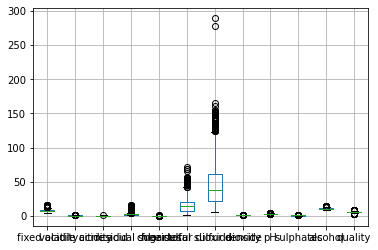

In [28]:

ax=df.boxplot()

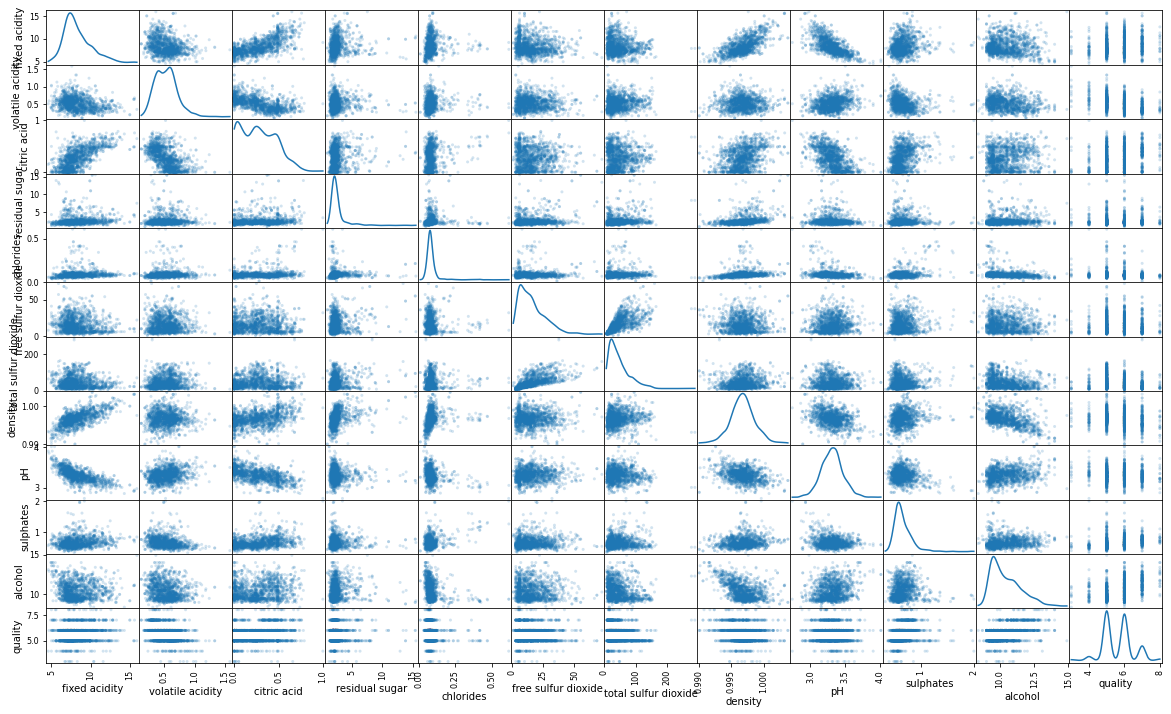

In [15]:
from pandas.plotting import scatter_matrix
scatter_matrix(df,alpha=0.2,figsize=(20,12),diagonal='kde');

In [16]:
corr_matrix=df.corr(method='spearman')

In [17]:
corr_matrix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.278282,0.661708,0.220701,0.250904,-0.175137,-0.088417,0.623071,-0.706674,0.212654,-0.066576,0.114084
volatile acidity,-0.278282,1.000000,-0.610259,0.032386,0.158770,0.021163,0.094110,0.025014,0.233572,-0.325584,-0.224932,-0.380647
citric acid,0.661708,-0.610259,1.000000,0.176417,0.112577,-0.076452,0.009400,0.352285,-0.548026,0.331074,0.096456,0.213481
residual sugar,0.220701,0.032386,0.176417,1.000000,0.212959,0.074618,0.145375,0.422266,-0.089971,0.038332,0.116548,0.032048
chlorides,0.250904,0.158770,0.112577,0.212959,1.000000,0.000805,0.130033,0.411390,-0.234361,0.020825,-0.284504,-0.189922
free sulfur dioxide,-0.175137,0.021163,-0.076452,0.074618,0.000805,1.000000,0.789698,-0.041178,0.115679,0.045862,-0.081367,-0.056901
total sulfur dioxide,-0.088417,0.094110,0.009400,0.145375,0.130033,0.789698,1.000000,0.129332,-0.009841,-0.000504,-0.257806,-0.196735
density,0.623071,0.025014,0.352285,0.422266,0.411390,-0.041178,0.129332,1.000000,-0.312055,0.161478,-0.462445,-0.177074
pH,-0.706674,0.233572,-0.548026,-0.089971,-0.234361,0.115679,-0.009841,-0.312055,1.000000,-0.080306,0.179932,-0.043672
sulphates,0.212654,-0.325584,0.331074,0.038332,0.020825,0.045862,-0.000504,0.161478,-0.080306,1.000000,0.207330,0.377060


In [18]:
import seaborn as sns 

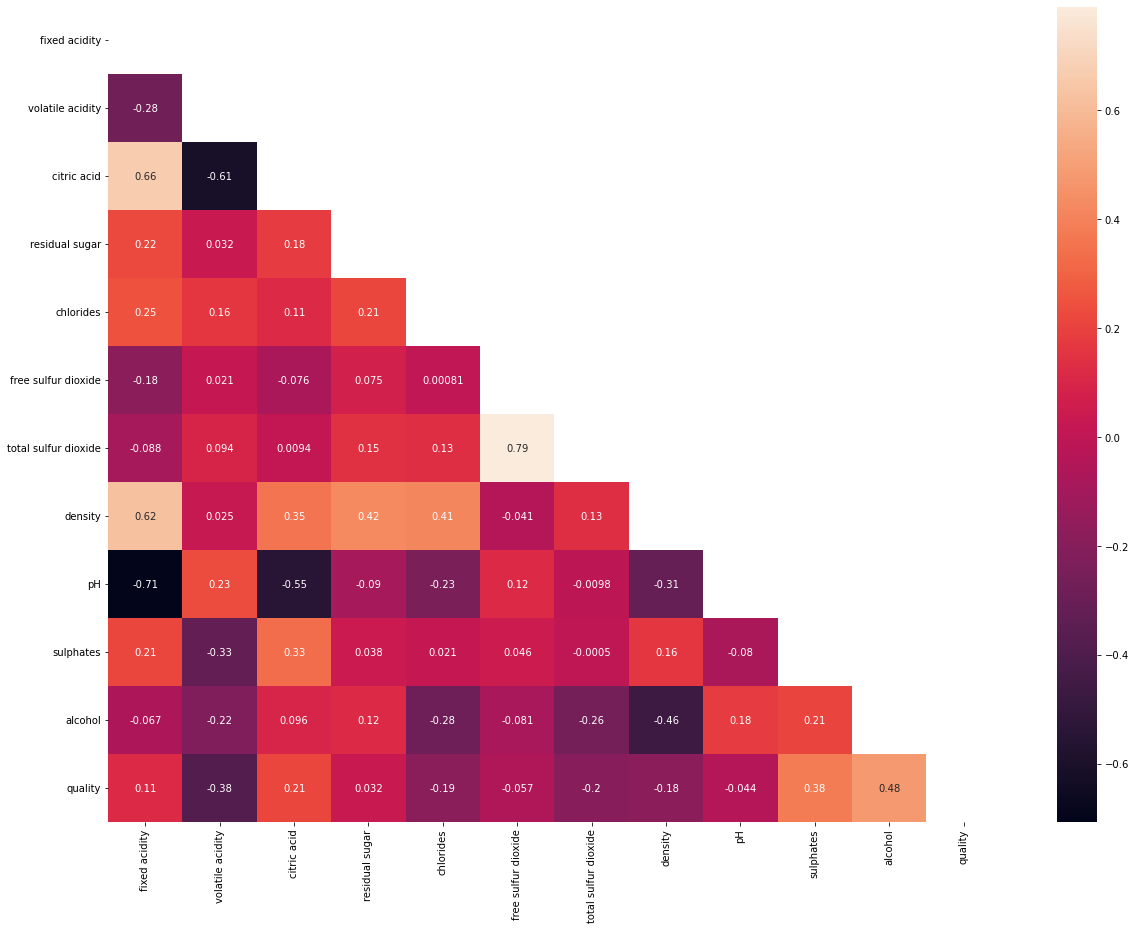

In [23]:
mask=np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)]=True
fig,ax=plt.subplots(figsize=(20,15))
ax=sns.heatmap(corr_matrix, mask=mask, annot=True)
plt.show()

In [22]:
df['alcohol'].unique()

array([ 9.4       ,  9.8       , 10.        ,  9.5       , 10.5       ,
        9.2       ,  9.9       ,  9.1       ,  9.3       ,  9.        ,
        9.7       , 10.1       , 10.6       ,  9.6       , 10.8       ,
       10.3       , 13.1       , 10.2       , 10.9       , 10.7       ,
       12.9       , 10.4       , 13.        , 14.        , 11.5       ,
       11.4       , 12.4       , 11.        , 12.2       , 12.8       ,
       12.6       , 12.5       , 11.7       , 11.3       , 12.3       ,
       12.        , 11.9       , 11.8       ,  8.7       , 13.3       ,
       11.2       , 11.6       , 11.1       , 13.4       , 12.1       ,
        8.4       , 12.7       , 14.9       , 13.2       , 13.6       ,
       13.5       , 10.03333333,  9.55      ,  8.5       , 11.06666667,
        9.56666667, 10.55      ,  8.8       , 13.56666667, 11.95      ,
        9.95      ,  9.23333333,  9.25      ,  9.05      , 10.75      ])

In [29]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 

In [30]:
#set X and y 
y=df['quality']
X=df.drop(['quality'],axis=1)

In [31]:
len(y)

1599

In [33]:
y.unique()

array([5, 6, 7, 4, 8, 3])

In [35]:
s_c=StandardScaler() 
X_scaled=s_c.fit_transform(X)


In [37]:
X_scaled

array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.01092425,  0.54162988]])

In [38]:
#train test split 
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=4)

In [54]:
Knn=KNeighborsClassifier(n_neighbors=3,p=2)

In [55]:
Knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [59]:
y_pred=Knn.predict(X_test)

In [50]:
y.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [51]:
y_pred

array([6, 5, 5, 7, 5, 5, 4, 6, 6, 6, 6, 7, 6, 6, 6, 5, 5, 6, 6, 5, 6, 5,
       5, 6, 7, 6, 6, 5, 5, 6, 6, 6, 7, 5, 6, 5, 7, 5, 6, 5, 6, 6, 6, 6,
       5, 6, 6, 5, 5, 5, 5, 6, 5, 5, 6, 6, 6, 5, 5, 6, 6, 6, 6, 5, 6, 5,
       6, 6, 6, 5, 6, 5, 7, 7, 6, 5, 5, 5, 5, 6, 6, 5, 6, 5, 5, 5, 7, 5,
       6, 5, 6, 5, 5, 5, 7, 5, 5, 6, 6, 5, 5, 6, 6, 5, 5, 6, 5, 5, 5, 6,
       5, 5, 6, 6, 5, 6, 7, 7, 5, 6, 6, 5, 5, 5, 5, 5, 6, 5, 6, 5, 5, 6,
       6, 6, 7, 5, 5, 5, 7, 6, 7, 5, 5, 6, 5, 5, 6, 6, 7, 5, 6, 6, 5, 6,
       6, 5, 5, 5, 5, 5, 7, 6, 5, 5, 5, 6, 7, 4, 5, 6, 5, 5, 5, 5, 6, 5,
       6, 6, 6, 6, 5, 5, 6, 5, 7, 7, 5, 5, 6, 5, 6, 6, 5, 6, 6, 6, 6, 6,
       6, 5, 5, 5, 5, 6, 6, 5, 6, 6, 6, 5, 7, 6, 5, 6, 5, 5, 6, 6, 7, 5,
       6, 6, 6, 5, 5, 6, 5, 6, 5, 6, 5, 6, 6, 6, 5, 5, 5, 5, 6, 7, 4, 5,
       6, 7, 5, 5, 5, 6, 6, 6, 5, 6, 5, 4, 6, 6, 5, 5, 5, 5, 5, 6, 6, 5,
       6, 6, 5, 5, 6, 5, 5, 6, 6, 6, 5, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5,
       5, 6, 5, 5, 6, 7, 5, 5, 6, 6, 6, 6, 5, 5, 7,

In [57]:
c_m=confusion_matrix(y_test,y_pred)
c_m

array([[  1,   0,   0,   1,   0,   0],
       [  2,   0,   8,   5,   0,   0],
       [  2,   9, 140,  55,   5,   0],
       [  0,   5,  66, 101,  17,   1],
       [  0,   0,  13,  17,  29,   0],
       [  0,   0,   0,   3,   0,   0]])

In [60]:
accuracy_score(y_test,y_pred)

0.5645833333333333